## Perceptron Clasificacion Binaria

Este modelo está inspirado en el funcionamiento de las neuronas biológicas que forman las redes neuronales de nuestros cerebros, recibiendo una serie de señales de entrada y devolviendo un resultado a la salida, calculando una suma ponderada de todos los inputs y aplicando una función de activación.
Para realizar el ejemplo se necesita un conjunto de datos formado por un número determinado de elementos con varias características acompañados de sus correspondiente clase. Se va a utilizar un dataset muy utilizado en el ámbito académico muy útil para aprender a desarrollar modelos de clasificación: El dataset Iris. Este dataset contiene ejemplos de flores que tendremos que clasificar en 3 grupos diferentes a partir del ancho y longitud de sus pétalos y sépalos (en total 4 características). Este dataset está disponible a través de la librería Scikit Learn.

Se buscara determinar si un flor es de un tipo o de otra

By Jean Carlo Alvarez Ramirez



# Cargar las librerias a utilizar

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from matplotlib.colors import ListedColormap
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

Primero, el código importa varias bibliotecas y funciones necesarias:

load_iris de sklearn.datasets: Para cargar el conjunto de datos de flores iris.
numpy: Para operaciones numéricas.
Varias funciones de matplotlib: Para crear gráficos y animaciones.
HTML de IPython.display: Para mostrar contenido HTML (probablemente para la animación).


El conjunto de datos de iris es muy conocido en el aprendizaje automático. Contiene medidas de diferentes tipos de flores iris.
Aunque no se muestra en este fragmento, es probable que el código siguiente use estas importaciones para:

Cargar los datos de iris.
Crear una visualización de los datos.
Animar esta visualización para mostrar cómo cambian los datos o cómo se clasifican las flores.


La importación de FuncAnimation sugiere que se creará una animación basada en una función.
ListedColormap se utilizará probablemente para asignar colores a diferentes clases de flores en la visualización.

Este código es solo la configuración inicial

# Carga de los Datos

In [ ]:
iris = load_iris()
X= iris.data[:,(2,3)]
y = iris.target

X.shape,y.shape

((150, 2), (150,))

iris = load_iris()

Esta línea carga el conjunto de datos de iris utilizando la función que importamos anteriormente.
El conjunto de datos de iris es un conjunto estándar que contiene medidas de 150 flores de iris de tres especies diferentes.


X = iris.data[:, (2,3)]

Aquí estamos seleccionando algunas características específicas del conjunto de datos.
iris.data contiene todas las medidas de las flores.
[:, (2,3)] es una técnica de indexación en NumPy que significa:

Tomar todas las filas (:)
Pero solo las columnas 2 y 3


Estas columnas probablemente corresponden a la longitud y ancho del pétalo de las flores.


y = iris.target

iris.target contiene las etiquetas de clase para cada flor (es decir, a qué especie pertenece cada flor).
Estamos asignando estas etiquetas a la variable y.


X.shape, y.shape

Esta línea no hace nada por sí misma, pero si se imprime, mostraría las dimensiones de X e y.
X.shape probablemente será (150, 2), lo que significa 150 flores, cada una con 2 características.
y.shape probablemente será (150,), lo que significa 150 etiquetas de clase, una para cada flor.



En resumen, este código está preparando los datos del conjunto de iris para su posterior análisis o visualización. Está seleccionando dos características específicas (longitud y ancho del pétalo) y las etiquetas de clase correspondientes.



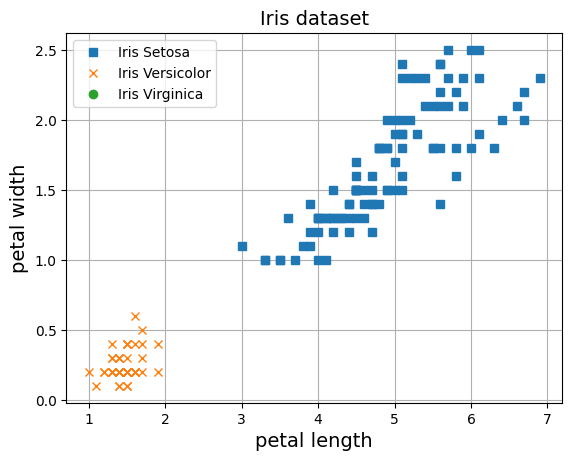

In [ ]:
plt.plot(X[y==0, 0], X[y==0, 1], 's', label="Iris Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], 'x', label="Iris Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], 'o', label="Iris Virginica")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

Este código crea una visualización de los datos de iris que preparamos anteriormente. Vamos a explicarlo línea por línea:

1. `plt.plot(X[y==0, 0], X[y==0, 1], 's', label="Iris Setosa")`
   - Esto dibuja puntos para la especie Iris Setosa.
   - `X[y==0, 0]` selecciona la longitud del pétalo para todas las flores Setosa.
   - `X[y==0, 1]` selecciona el ancho del pétalo para todas las flores Setosa.
   - `'s'` especifica que se usen cuadrados para representar estos puntos.
   - `label="Iris Setosa"` da un nombre a esta serie de datos para la leyenda.

2. `plt.plot(X[y==1, 0], X[y==1, 1], 'x', label="Iris Versicolor")`
   - Similar al anterior, pero para Iris Versicolor, usando 'x' como marcador.

3. `plt.plot(X[y==2, 0], X[y==2, 1], 'o', label="Iris Virginica")`
   - Para Iris Virginica, usando 'o' (círculos) como marcador.

4. `plt.grid()`
   - Añade una cuadrícula al gráfico para facilitar la lectura.

5. `plt.legend()`
   - Muestra una leyenda que explica qué representa cada tipo de marcador.

6. `plt.xlabel('petal length', fontsize=14)`
   - Etiqueta el eje X como "longitud del pétalo".

7. `plt.ylabel('petal width', fontsize=14)`
   - Etiqueta el eje Y como "ancho del pétalo".

8. `plt.title("Iris dataset", fontsize=14)`
   - Añade un título al gráfico.

9. `plt.show()`
   - Muestra el gráfico.


Este código creará un gráfico de dispersión que muestra la relación entre la longitud y el ancho del pétalo para las tres especies de iris, cada una representada con un símbolo diferente. Esto permite visualizar cómo se agrupan las diferentes especies y si se pueden distinguir fácilmente basándose en estas dos características.

# Defino la clase a clasificar

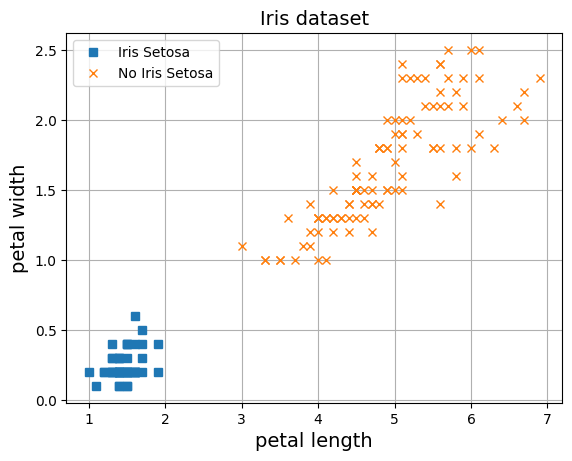

In [ ]:
y= (iris.target ==0).astype(np.int64)

plt.plot(X[y==1, 0], X[y==1, 1], 's', label="Iris Setosa")
plt.plot(X[y==0, 0], X[y==0, 1], 'x', label="No Iris Setosa")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

Este código es una variación del anterior, pero ahora está creando una visualización binaria del conjunto de datos de iris. Vamos a explicarlo paso a paso:

1. `y = (iris.target == 0).astype(np.int64)`
   - Esta línea crea una nueva variable `y` que es binaria (0 o 1).
   - `iris.target == 0` crea un array booleano donde `True` corresponde a Iris Setosa (que tiene etiqueta 0 en el conjunto de datos original) y `False` para las otras especies.
   - `.astype(np.int64)` convierte este array booleano a enteros (0 para False, 1 para True).

2. `plt.plot(X[y==1, 0], X[y==1, 1], 's', label="Iris Setosa")`
   - Dibuja puntos para Iris Setosa usando cuadrados ('s').
   - Ahora `y==1` corresponde a Iris Setosa.

3. `plt.plot(X[y==0, 0], X[y==0, 1], 'x', label="No Iris Setosa")`
   - Dibuja puntos para todas las otras especies (no Setosa) usando 'x'.
   - `y==0` ahora corresponde a todas las especies que no son Setosa.

4. Las líneas restantes son similares al código anterior:
   - Añaden una cuadrícula (`plt.grid()`)
   - Muestran una leyenda (`plt.legend()`)
   - Etiquetan los ejes X e Y
   - Añaden un título al gráfico
   - Muestran el gráfico (`plt.show()`)

La principal diferencia en esta visualización es que ahora estamos agrupando los datos en dos categorías: "Iris Setosa" y "No Iris Setosa" (que incluye tanto Versicolor como Virginica). Esto podría ser útil si estuviéramos interesados en un problema de clasificación binaria, por ejemplo, distinguir Iris Setosa de las otras especies.

Esta visualización mostrará cómo se separa Iris Setosa de las otras dos especies en términos de longitud y ancho del pétalo, lo que podría ser útil para entender si estas características son suficientes para distinguir Setosa de las otras especies.

# Defino la clase del Perceptron

In [ ]:
class Perceptron():
  def __init__(self, size):
    self.w = np.random.randn(size)
    self.ws = []

  def __call__(self, w, x):
    return np.dot(x, w) > 0

  def fit(self, x, y, epochs, lr):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(epochs):
        # Batch Gradient Descent
        y_hat = self(self.w, x)
        # función de pérdida (MSE)
        l = 0.5*(y_hat - y)**2
        # derivadas
        dldh = (y_hat - y)
        dhdw = x
        dldw = np.dot(dldh, dhdw)
        # actualizar pesos
        self.w = self.w - lr*dldw
        # guardar pesos para animación
        self.ws.append(self.w.copy())


este código define una clase `Perceptron`, que es un tipo simple de neurona artificial:

1. Definición de la clase:
   ```python
   class Perceptron():
   ```

2. Método de inicialización:
   ```python
   def __init__(self, size):
     self.w = np.random.randn(size)
     self.ws = []
   ```
   - Inicializa los pesos (`w`) aleatoriamente.
   - Crea una lista vacía (`ws`) para almacenar los pesos durante el entrenamiento.

3. Método `__call__`:
   ```python
   def __call__(self, w, x):
     return np.dot(x, w) > 0
   ```
   - Define cómo se comporta el perceptrón cuando se le llama como una función.
   - Calcula el producto punto entre los pesos y las entradas, y devuelve True si es mayor que 0.

4. Método de entrenamiento `fit`:
   ```python
   def fit(self, x, y, epochs, lr):
   ```
   - `x`: datos de entrada
   - `y`: etiquetas reales
   - `epochs`: número de iteraciones de entrenamiento
   - `lr`: tasa de aprendizaje

5. Preparación de los datos:
   ```python
   x = np.c_[np.ones(len(x)), x]
   ```
   - Añade una columna de unos a `x` para el término de sesgo.

6. Bucle de entrenamiento:
   ```python
   for epoch in range(epochs):
   ```

7. Dentro del bucle:
   - Calcula las predicciones: `y_hat = self(self.w, x)`
   - Calcula la función de pérdida (Error Cuadrático Medio): `l = 0.5*(y_hat - y)**2`
   - Calcula las derivadas:
     ```python
     dldh = (y_hat - y)
     dhdw = x
     dldw = np.dot(dldh, dhdw)
     ```
   - Actualiza los pesos: `self.w = self.w - lr*dldw`
   - Guarda los pesos actuales: `self.ws.append(self.w.copy())`

Este perceptrón utiliza el descenso de gradiente por lotes para ajustar sus pesos. En cada época, calcula las predicciones para todos los datos, calcula el error, y luego ajusta los pesos en la dirección que reduce este error.

La lista `self.ws` se utiliza para visualizar cómo cambian los pesos durante el entrenamiento.

# Normalizamos

In [ ]:
print(X.mean(axis=0), X.std(axis=0))

X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_norm = (X - X_mean) / X_std

print(X_norm.mean(axis=0), X_norm.std(axis=0))

[3.758      1.19933333] [1.75940407 0.75969263]
[-4.26325641e-16 -4.73695157e-16] [1. 1.]


Código paso a paso:

1. `print(X.mean(axis=0), X.std(axis=0))`
   - Calcula y muestra la media y la desviación estándar de cada característica en X.
   - `axis=0` significa que se calculan a lo largo de las columnas (es decir, para cada característica).

2. `X_mean, X_std = X.mean(axis=0), X.std(axis=0)`
   - Guarda la media y la desviación estándar de cada característica en variables separadas.

3. `X_norm = (X - X_mean) / X_std`
   - Esta línea normaliza los datos X.
   - Resta la media a cada valor y luego divide por la desviación estándar.
   - Esto se conoce como estandarización o normalización Z-score.

4. `print(X_norm.mean(axis=0), X_norm.std(axis=0))`
   - Imprime la media y la desviación estándar de los datos normalizados.

El propósito de este código es normalizar los datos. La normalización es una técnica común en el procesamiento de datos que tiene varios beneficios:

1. Pone todas las características en la misma escala, lo que puede mejorar el rendimiento de muchos algoritmos de aprendizaje automático.
2. Hace que los datos tengan una media de 0 y una desviación estándar de 1.
3. Puede ayudar a que el algoritmo de aprendizaje converja más rápidamente.

Después de la normalización, esperarías ver que:
- La media de cada característica es muy cercana a 0.
- La desviación estándar de cada característica es muy cercana a 1.

Esto es lo que probablemente muestre la última línea de impresión, confirmando que la normalización se ha realizado correctamente.

¿Te gustaría que profundice en algún aspecto específico de la normalización o en cómo afecta esto a tu análisis de datos?

# Entrenamos el perceptron

In [ ]:
np.random.seed(42)

perceptron = Perceptron(3)
epochs, lr = 50, 0.1
perceptron.fit(X_norm, y, epochs, lr)

código paso a paso:

1. `np.random.seed(42)`
   - Establece una semilla para el generador de números aleatorios de NumPy.
   - Esto asegura que los resultados sean reproducibles cada vez que ejecutes el código.

2. `perceptron = Perceptron(3)`
   - Crea una nueva instancia de la clase Perceptron que definimos anteriormente.
   - El argumento `3` indica que el perceptrón tendrá 3 pesos (probablemente 2 para las características y 1 para el sesgo).

3. `epochs, lr = 25, 0.1`
   - Define el número de épocas de entrenamiento (25) y la tasa de aprendizaje (0.1).
   - Épocas: Cuántas veces el algoritmo pasará por todo el conjunto de datos durante el entrenamiento.
   - Tasa de aprendizaje: Controla cuánto se ajustan los pesos en cada iteración.

4. `perceptron.fit(X_norm, y, epochs, lr)`
   - Inicia el entrenamiento del perceptrón con los datos normalizados (X_norm) y las etiquetas (y).
   - Usa los valores de épocas y tasa de aprendizaje que definimos.

Lo que está sucediendo aquí es:

1. Estamos asegurando que el experimento sea reproducible con la semilla aleatoria.
2. Creamos un perceptrón con 3 pesos.
3. Configuramos los hiperparámetros del entrenamiento (épocas y tasa de aprendizaje).
4. Entrenamos el perceptrón en los datos normalizados del conjunto de iris.

Durante el entrenamiento, el perceptrón intentará encontrar un plano (en este caso, ya que tenemos 2 características) que separe mejor las dos clases (Iris Setosa vs No Iris Setosa, basándonos en tu código anterior).

El método `fit` que definimos anteriormente realizará las siguientes acciones:
- En cada época, hará predicciones para todos los datos.
- Calculará el error de estas predicciones.
- Ajustará los pesos para reducir este error.
- Guardará los pesos en cada iteración (en `self.ws`).

Después de este entrenamiento, el perceptrón debería ser capaz de clasificar nuevos datos de iris como Setosa o No Setosa basándose en la longitud y ancho del pétalo.

# Graficamos

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, autoscale_on=False)
def plot(i, axes = [0, 5, 0, 2], label="Iris Setosa"):
    ax.clear()
    w = perceptron.ws[i]
    tit = ax.set_title(f"Epoch {i+1}", fontsize=14)
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = (np.c_[x0.ravel(), x1.ravel()] - X_mean)/X_std
    X_new = np.c_[np.ones(len(X_new)), X_new]
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)
    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"No {label}")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label=label)
    ax.contourf(x0, x1, zz)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    return ax

anim = animation.FuncAnimation(fig, plot, frames=epochs, interval=200)
plt.close()
HTML(anim.to_html5_video())

Este código crea una animación que muestra cómo el perceptrón aprende a clasificar las flores de iris a lo largo de las épocas de entrenamiento. Vamos a desglosarlo:

1. Configuración inicial:
   - Crea una figura y un eje para el gráfico.

2. Función `plot`:
   - Esta función se llama para cada fotograma de la animación.
   - Limpia el eje y configura el título con el número de época actual.
   - Crea una cuadrícula de puntos para visualizar la frontera de decisión.
   - Normaliza estos nuevos puntos de la misma manera que los datos de entrenamiento.
   - Usa el perceptrón para predecir las clases de estos puntos.
   - Dibuja los puntos de datos originales (Iris Setosa y No Iris Setosa).
   - Dibuja la frontera de decisión utilizando `contourf`.
   - Configura las etiquetas de los ejes y la leyenda.

3. Creación de la animación:
   - Usa `animation.FuncAnimation` para crear la animación.
   - Llama a la función `plot` para cada época de entrenamiento.
   - Configura el intervalo entre fotogramas a 200 milisegundos.

4. Generación del video:
   - Cierra la figura de matplotlib para evitar que se muestre.
   - Convierte la animación a un video HTML5.

Esta animación te permitirá visualizar cómo el perceptrón ajusta su frontera de decisión a medida que avanza el entrenamiento. Verás cómo la línea que separa las dos clases (Iris Setosa y No Iris Setosa) se mueve y se ajusta con cada época.


# Revisamos

In [ ]:
# últimos pesos encontrados

w = perceptron.ws[-1]
w

array([ -6.80328585, -12.14039639, -11.23194058])

El código tiene dos partes principales:

1. **`w = perceptron.ws[-1]`:**
   - Aquí, `perceptron` es un objeto que contiene el modelo de perceptrón entrenado.
   - `ws` es una lista que almacena los pesos del perceptrón después de cada iteración del proceso de entrenamiento.
   - `-1` se refiere al último elemento de la lista, lo que significa que esta línea está tomando los pesos finales del perceptrón después de haber completado todas las iteraciones de entrenamiento.
   - La variable `w` almacena estos últimos pesos encontrados.

2. **`w`:**
   - Al escribir solo `w`, normalmente en un entorno interactivo de Python (como un Jupyter Notebook o Google Colab), se muestra el valor almacenado en `w`, que son los últimos pesos del perceptrón.

Este código recupera y muestra los últimos pesos (o coeficientes) que el modelo de perceptrón encontró después de haber sido entrenado completamente. Estos pesos son fundamentales para la toma de decisiones del modelo, ya que determinan cómo se combinan las características de entrada para predecir una clase.

In [ ]:
x_new = [-13, -24, -23]
y_pred = perceptron(w, x_new)
y_pred # Iris Setosa

True

Este codigo ayuda a probar una predicción sobre un nuevo conjunto de datos de entrada, `x_new`:

1. **`x_new = [-13, -24, -23]`:**
   - `x_new` es un array o lista que contiene las características de un nuevo ejemplo que quieres clasificar. En este caso, `x_new` tiene tres valores: `-13`, `-24`, y `-23`.
   - Estos valores corresponden a las características de entrada que el perceptrón utilizará para hacer su predicción.

2. **`y_pred = perceptron(w, x_new)`:**
   - Esta línea aplica el perceptrón al nuevo conjunto de datos de entrada `x_new`.
   - `w` son los últimos pesos obtenidos del perceptrón, que probablemente se usaron para entrenar el modelo.
   - `perceptron(w, x_new)` es una función que toma como entrada los pesos `w` y las características `x_new`, y calcula la salida del perceptrón, que es la predicción de la clase a la que pertenece el nuevo ejemplo.
   - El resultado de esta predicción se almacena en `y_pred`.

3. **`y_pred`:**
   - Finalmente, al escribir solo `y_pred`, se muestra la predicción que hizo el modelo. En este contexto, parece que `y_pred` corresponde a la clase `Iris Setosa`, lo que sugiere que el modelo ha clasificado el nuevo ejemplo como perteneciente a esta clase.
   - En el contexto de la clasificación de flores Iris, `Iris Setosa` es una de las tres especies de flores que el modelo podría predecir.

Este código toma un nuevo conjunto de características, utiliza un perceptrón previamente entrenado para hacer una predicción, y luego muestra la clase predicha (`Iris Setosa`).

In [ ]:
x_new = [1, 4, 0.5]
y_pred = perceptron(w, x_new)
y_pred # No Iris Setosa

False

Este  código sigue el mismo patrón que el anterior, pero con un nuevo conjunto de datos de entrada.

1. **`x_new = [1, 4, 0.5]`:**
   - `x_new` es un array o lista que contiene un nuevo conjunto de características que se van a clasificar.
   - En este caso, `x_new` tiene tres valores: `1`, `4`, y `0.5`. Estos valores representan las características de entrada del nuevo ejemplo que el perceptrón va a evaluar.

2. **`y_pred = perceptron(w, x_new)`:**
   - Esta línea aplica el perceptrón al nuevo conjunto de características `x_new`.
   - `w` son los pesos finales del modelo de perceptrón obtenidos después del entrenamiento.
   - La función `perceptron(w, x_new)` utiliza estos pesos y las características de `x_new` para calcular la salida del perceptrón, es decir, la clase predicha para este nuevo ejemplo.
   - El resultado de esta predicción se almacena en la variable `y_pred`.

3. **`y_pred`:**
   - Al escribir solo `y_pred`, se muestra la predicción realizada por el perceptrón.
   - En este caso, la predicción es que el nuevo ejemplo **no** pertenece a la clase `Iris Setosa`. Es probable que `y_pred` devuelva una etiqueta diferente (por ejemplo, `Iris Versicolor` o `Iris Virginica`).

En resumen, este código toma un nuevo conjunto de características, usa un perceptrón entrenado para hacer una predicción, y luego muestra que el nuevo ejemplo no pertenece a la clase `Iris Setosa`.

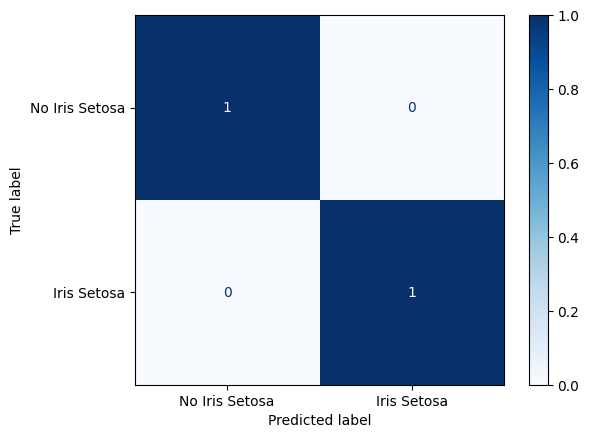

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_test = [
    [-13, -24, -23],
    [1, 4, 0.5],
]

y_true = [
    1,  # 1 representa Iris Setosa
    0,  # 0 representa No Iris Setosa
]

# Predice las etiquetas para los datos de prueba utilizando el modelo de perceptrón
y_pred = [perceptron(w, x) for x in X_test]

# Genera la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Muestra la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Iris Setosa', 'Iris Setosa'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Explicación del Código:

1. **Importaciones:**
   - `confusion_matrix` y `ConfusionMatrixDisplay` de `sklearn.metrics` se utilizan para calcular y mostrar la matriz de confusión.
   - `matplotlib.pyplot` se usa para visualizar la matriz de confusión.

2. **Conjunto de datos de prueba (`X_test`) y etiquetas verdaderas (`y_true`):**
   - `X_test` es una lista de ejemplos que quieres clasificar.
   - `y_true` es una lista de las etiquetas correctas para cada ejemplo en `X_test`. En este ejemplo, `1` podría representar `Iris Setosa` y `0` podría representar `No Iris Setosa`.

3. **Predicciones del modelo (`y_pred`):**
   - El modelo de perceptrón se usa para predecir las etiquetas de `X_test`. Esto genera la lista `y_pred` que contiene las predicciones del modelo.

4. **Matriz de confusión (`cm`):**
   - Se genera utilizando `confusion_matrix(y_true, y_pred)`, comparando las etiquetas verdaderas con las predicciones del modelo.

5. **Visualización:**
   - `ConfusionMatrixDisplay` se usa para visualizar la matriz de confusión de una manera más comprensible.
   - La matriz se muestra con `plt.show()`.

El gráfico que se genera es una matriz de confusión que te muestra cómo se desempeñó tu modelo en el conjunto de datos de prueba, indicando cuántos ejemplos se clasificaron correctamente y cuántos se clasificaron incorrectamente para cada clase.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Calcula el accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calcula el precision
precision = precision_score(y_true, y_pred)
print(f'Precision: {precision:.2f}')

# Calcula el recall
recall = recall_score(y_true, y_pred)
print(f'Recall: {recall:.2f}')

# Calcula el F1-score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1:.2f}')

# Obtén un informe completo de clasificación
report = classification_report(y_true, y_pred, target_names=['No Iris Setosa', 'Iris Setosa'])
print(report)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
                precision    recall  f1-score   support

No Iris Setosa       1.00      1.00      1.00         1
   Iris Setosa       1.00      1.00      1.00         1

      accuracy                           1.00         2
     macro avg       1.00      1.00      1.00         2
  weighted avg       1.00      1.00      1.00         2



### Explicación del Código:

1. **Importaciones:**
   - `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, y `classification_report` se importan desde `sklearn.metrics`. Estas funciones se utilizan para calcular diferentes métricas de rendimiento del modelo.

2. **Conjunto de datos de prueba (`X_test`) y etiquetas verdaderas (`y_true`):**
   - Igual que antes, `X_test` es una lista de ejemplos a clasificar y `y_true` es la lista de etiquetas verdaderas correspondientes.

3. **Predicciones del modelo (`y_pred`):**
   - Las predicciones se obtienen utilizando el modelo de perceptrón, generando una lista `y_pred` con las predicciones del modelo.

4. **Cálculo de métricas:**
   - **`accuracy_score(y_true, y_pred)`**: Calcula la precisión, es decir, la proporción de predicciones correctas.
   - **`precision_score(y_true, y_pred)`**: Calcula la precisión, que es la proporción de verdaderos positivos entre los positivos predichos.
   - **`recall_score(y_true, y_pred)`**: Calcula el recall (sensibilidad), que es la proporción de verdaderos positivos entre los positivos reales.
   - **`f1_score(y_true, y_pred)`**: Calcula el F1-score, que es la media armónica de la precisión y el recall.
   - **`classification_report(y_true, y_pred)`**: Genera un informe detallado que incluye precisión, recall, F1-score y más para cada clase.

5. **Salida:**
   - Los valores de cada métrica se imprimen, y el `classification_report` proporciona un resumen completo del rendimiento del modelo para cada clase.

Este conjunto de métricas te dará una visión completa del rendimiento de tu modelo de perceptrón en el conjunto de datos de prueba.